## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 10
---------------------------------------

GOALS:

1. Practice the principles of good data visualization.
2. Work on more advanced plotting.

----------------------------------------------------------

This homework has **2 questions** and **2 exercises**.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
file_name = 'data/brexit.csv'
DF = pd.read_csv(file_name)

## Do opinions about Brexit depend on region?

**Am I clearly answering my question with these pictures?**

In [3]:
mask = DF['location'] != 'total'
DF_plot=DF[mask]

DF_plot['location'].replace('london','London',inplace=True)
DF_plot['location'].replace('rest_of_south','Rest of South',inplace=True)
DF_plot['location'].replace('midlands_wales','Midlands and Wales',inplace=True)
DF_plot['location'].replace('north','North',inplace=True)
DF_plot['location'].replace('scot','Scotland',inplace=True)

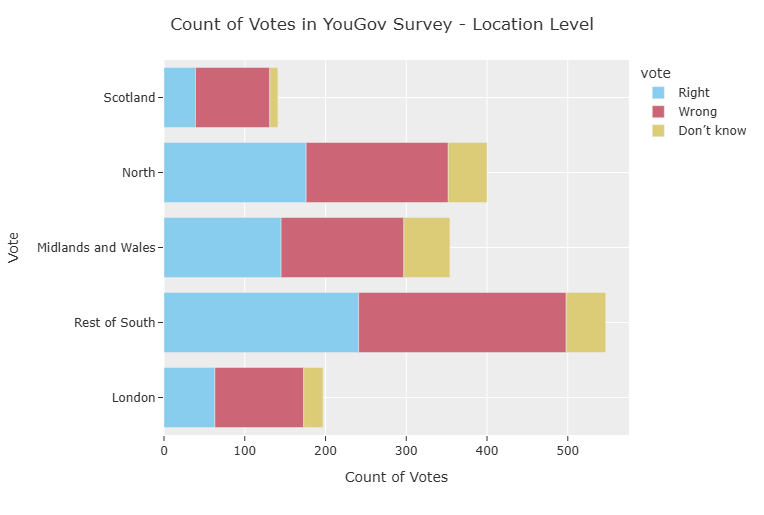

In [4]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='location',x='count',
             color='vote',
             color_discrete_sequence=px.colors.qualitative.Safe)

fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories },
                  title='Count of Votes in YouGov Survey - Location Level',
                  xaxis_title="Count of Votes",
                  yaxis_title="Vote",
                  template='ggplot2',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

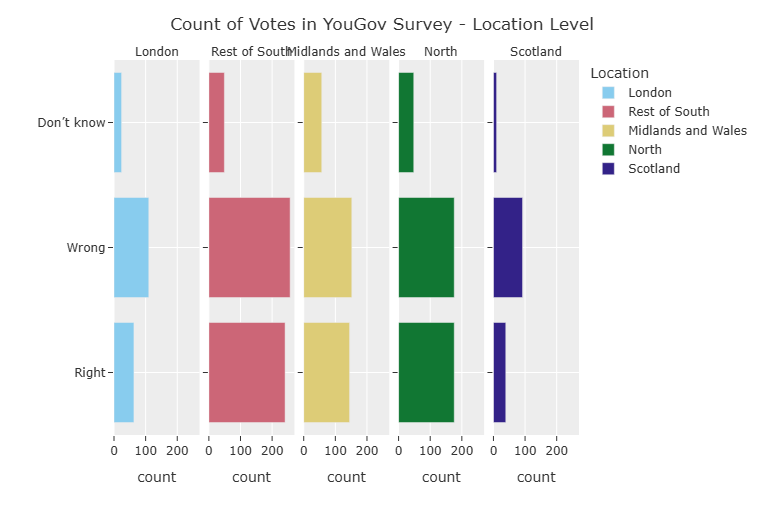

In [5]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             color='location',
             facet_col='location',
            color_discrete_sequence=px.colors.qualitative.Safe)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='Count of Votes in YouGov Survey - Location Level',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500)

fig.show()

**Q** Which of the plots do you think is better. What you do notice are the pluses and minuses of each figure?

In [ ]:
I think the second one is better because it breaks it down a little more visuallly. One of the pluses is that the second one is more broken up, but looks a little repetitive. The first one is not repetitive, but the data is kind of piled up.

**Q** Is there any redundancy in the second graph? What is redundant?

In [ ]:
The word count is redundant after the first one because now we already know the count is at the bottom so we dont need it on the other 5 columns.

## Avoid Redundancy

Here is the same graph again, but avoiding redundancy.

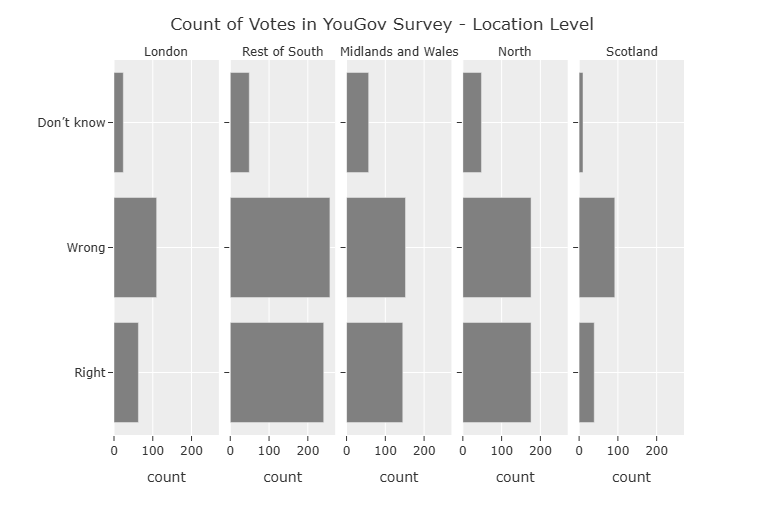

In [6]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             facet_col='location',
            color_discrete_sequence=['gray'])

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='Count of Votes in YouGov Survey - Location Level',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500)

fig.show()

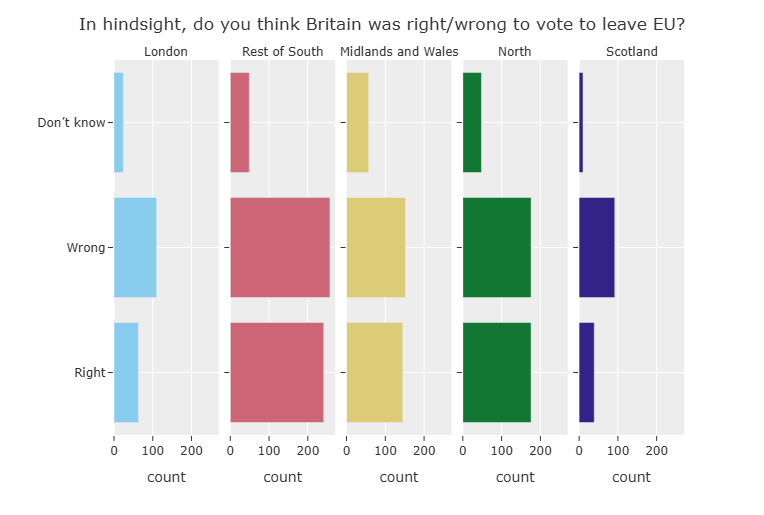

In [7]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             color='location',
             facet_col='location',
            color_discrete_sequence=px.colors.qualitative.Safe)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='In hindsight, do you think Britain was right/wrong to vote to leave EU?',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500,
                 showlegend=False)

fig.show()

**Q** Which of these two plots do you like better and why?

In [ ]:
I like the second one better because just color being added grabs my attention more than the first.

## Selecting meaningful colors.

[colorbrewer.org](https://colorbrewer2.org/)

Here is an example where colors were picked on the website above and the the codes were put into the color_discrete_map.

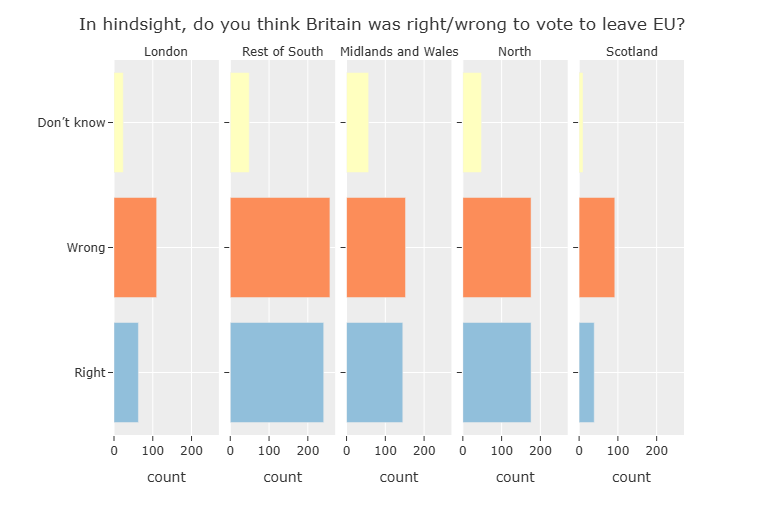

In [8]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             color='vote',
             facet_col='location',
             color_discrete_map={'Right':'#91bfdb','Wrong':'#fc8d59',"Don’t know":'#ffffbf'})

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='In hindsight, do you think Britain was right/wrong to vote to leave EU?',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500,
                 showlegend=False)

fig.show()


### Exercise 1 (Choose one!)

#### Data Vis Principles:

1. Order Matters
2. Put long categories on the y-axis
3. Pick a Purpose.
4. Keep scales consistent
5. Select meaningful colors
6. Use meaningful and nonredundant labels.

**Option 1.** 

Create your own plot of this data. Make it as nice as possible! Choose your own colors, themes, labels, ordering, etc. Decide if you prefer facets or colored bars. Make the labels as informative as possible. Try experimenting with things we haven't yet covered in class: look up how to add a caption or include textures in your plot.

Talk about the positives and negatives of your graph. How does it meet, not meet, or exceed the data visualization principles above?

**Option 2.**

Using data of your choice, create a beautiful data visualization. Try experimenting with things we haven't yet covered in class: look up how to add a caption or include textures in your plot.

Talk about the positives and negatives of your graph. How does it meet, not meet, or exceed the data visualization principles above?

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\chris\.cache\kagglehub\datasets\ahmeduzaki\global-earthquake-tsunami-risk-assessment-dataset\versions\1


In [10]:
ls


 Volume in drive C is Windows
 Volume Serial Number is EE90-506B

 Directory of C:\Users\chris\Data Science\Data-Science\Day10

10/15/2025  12:04 PM    <DIR>          .
10/15/2025  10:55 AM    <DIR>          ..
10/15/2025  10:55 AM    <DIR>          .ipynb_checkpoints
10/08/2025  11:15 AM    <DIR>          data
10/15/2025  12:04 PM           379,865 Day10-HW.ipynb
10/08/2025  11:15 AM    <DIR>          images
               1 File(s)        379,865 bytes
               5 Dir(s)  881,718,566,912 bytes free


In [11]:
# file = ("/Downloads/archive(3)/earthquake_data_tsunami.xlsx")
# DF = pd.read_csv(path)
import os
file = path + '/' + os.listdir(path)[0]

DF = pd.read_csv(file)

In [12]:
!conda install -y kagglehub



==> WARNING: A newer version of conda exists. <==

Jupyter detected...


    current version: 25.7.0


3 channel Terms of Service accepted
Retrieving notices: done
Channels:

    latest version: 25.9.1

 - conda-forge


 - defaults

Please update conda by running

Platform: win-64


    $ conda update -n base -c conda-forge conda

Solving environment: done



# All requested packages already installed.



In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("crawford/80-cereals")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\chris\.cache\kagglehub\datasets\crawford\80-cereals\versions\2


In [26]:
import os
print(os.listdir(path))
file = path + '/' + os.listdir(path)[0]
print(file)

['cereal.csv']
C:\Users\chris\.cache\kagglehub\datasets\crawford\80-cereals\versions\2/cereal.csv


In [27]:
DF=pd.read_csv(file)

In [28]:
DF

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [29]:
# Which manufacturer has the most protein max
DF['protein'].describe()

count    77.000000
mean      2.545455
std       1.094790
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       6.000000
Name: protein, dtype: float64

In [30]:
DF['mfr'].value_counts()

mfr
K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: count, dtype: int64

In [44]:
cols = ['mfr', 'protein']
graph_data = DF[cols].groupby(by='mfr').max()
graph_data['mfr'] = graph_data.index
graph_data

,protein,mfr
mfr,,
A,4,A
G,6,G
K,6,K
N,4,N
P,3,P
Q,5,Q
R,4,R


A = American Home Food Products;
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina

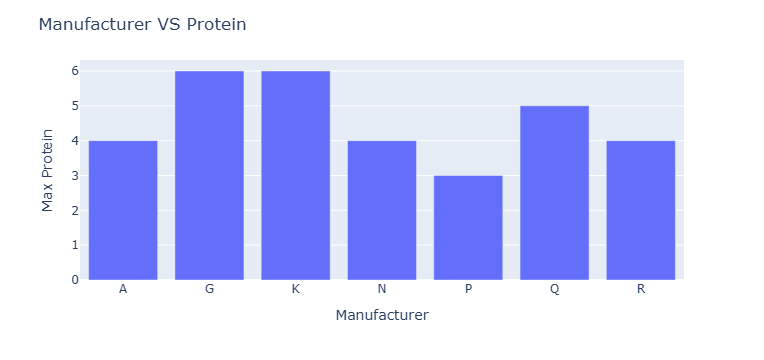

In [54]:
#my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(graph_data,y='protein',x='mfr',)
             # facet_col='location',
             # color_discrete_map={'Right':'#91bfdb','Wrong':'#fc8d59',"Don’t know":'#ffffbf'})

# fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

# my_categories = ['Dont know','Right','Wrong']
fig.update_layout(#yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                    title='Manufacturer VS Protein',
                    yaxis_title="Max Protein",
                    xaxis_title="Manufacturer")
#                   template='ggplot2',
#                   legend_title='Location',
#                   autosize=False,
#                   width=1000,
#                   height=500,
#                  showlegend=False)

fig.show()

In [43]:
mask = DF['protein'] == 6
DF[mask]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999
67,Special K,K,C,110,6,0,230,1.0,16.0,3,55,25,1,1.0,1.00,53.131324
